# Preprocess dataset for location of interest for analysis
In this notebook I show what the preprocessing functions do using Portsmouth (UK) as an example

In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_dir = "./data"

In [3]:
region_code = "SSD" #change it for the region code of your region of interest


Load the dataset asa build in Build_WaterQualityDataset

In [4]:
df = pd.read_csv(data_dir+'/'+region_code+'WaterQuality.csv', );

### 1) We keep only locations in Portsmouth Area selecting them manually 
automatic selection of location is shown in the example notebook ---

In [5]:
list_loc_langstone = ["SO-G0003493", "SO-G0016920","SO-G0003484","SO-G0016918","SO-G0015927",\
                              "SO-G0003468","SO-G0003467","SO-G0016921","SO-G0003473", "SO-G0003616", "SO-G0003625", "SO-G0003368", "SO-G0003508","SO-G0003484","SO-G0016873","SO-Y0003370"]

df_langstone = df[df["sample.samplingPoint.notation"].isin(list_loc_langstone)]

df_langstone.to_csv(data_dir+"WaterQuality_Portsmouth_frequentdet.csv")

### 2) The dataset contains lots of determinants that are not frequently observed, and therefore they are not good to study how pollution has evolved in time, we keep only frequent results, i.e. quantities that have been studied frequently in time

In [6]:
determinants = set(df_langstone['determinand.definition'])

sampling_time = set(df_langstone['sample.sampleDateTime'])


frequent_determinant = []

for det in determinants:
    if len(df_langstone[df_langstone['determinand.definition']== det]["result"])>len(sampling_time)/4:
        frequent_determinant.append(det)

In [7]:
set(frequent_determinant)

{'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'BOD : 5 Day ATU',
 'Chlorophyll : Acetone Extract',
 'Conductivity at 20 C',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Salinity : In Situ',
 'Sample Depth below surface',
 'Silicate, Filtered as SiO2',
 'Temperature of Water',
 'Time of high tide',
 'Time of sampling relative to previous high water',
 'Volume of Sample Filtered',
 'Water Depth',
 'pH'}

In [8]:
df_sub = df_langstone[df_langstone['determinand.definition'].isin(frequent_determinant)]

In [9]:
df_sub

,Unnamed: 0,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
133051,133051,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Orthophospht,"Orthophosphate, reactive as P",180,NaN,0.019,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133052,133052,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Temp Water,Temperature of Water,76,NaN,6.810,NaN,cel,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133053,133053,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Ammonia(N),Ammoniacal Nitrogen as N,111,NaN,0.031,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133054,133054,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,pH,pH,61,NaN,7.950,NaN,phunits,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133055,133055,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Cond @ 20C,Conductivity at 20 C,62,NaN,47000.000,NaN,us/cm,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275328,4275328,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,NaN,9.190,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275329,4275329,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,N Oxid Filt,"Nitrogen, Total Oxidised, Filtered as N",9943,<,0.007,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275330,4275330,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,CHLOROPHYLL,Chlorophyll : Acetone Extract,7887,NaN,1.300,NaN,ug/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275331,4275331,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,Nitrite Filt,"Nitrite, Filtered as N",6485,NaN,0.002,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280


### 3) Reshape dataset
We have each of the time and locations combination repeated as many time as different quantities are observed. It's easier to work on a dataset with each of the quantities observed as columns, therefore we pivot the dataset

In [10]:
piv = df_sub.pivot(index=['sample.sampleDateTime', "sample.samplingPoint.easting","sample.samplingPoint.northing",  "sample.sampledMaterialType.label"],\
                   columns=['determinand.definition',], values='result')

In [11]:
piv = piv.reset_index()

We can check that with the pivot, we do not affect data

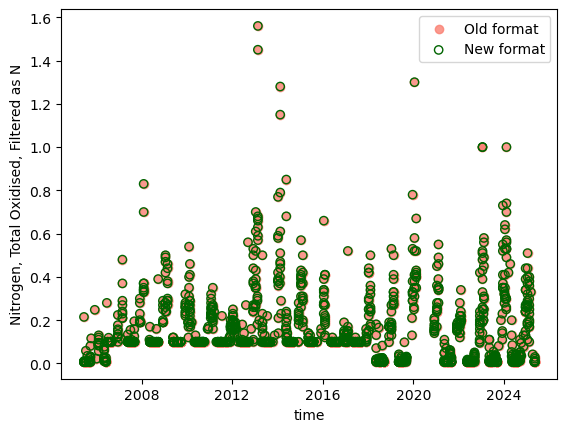

In [12]:
plt.scatter(pd.to_datetime(df_sub[df_sub['determinand.definition']== 'Nitrogen, Total Oxidised, Filtered as N']['sample.sampleDateTime'])\
         , df_sub[df_sub['determinand.definition']== 'Nitrogen, Total Oxidised, Filtered as N']["result"], label = "Old format", color="salmon",
           alpha=0.8) # old dataset format
plt.scatter(pd.to_datetime(piv['sample.sampleDateTime'])\
         , piv['Nitrogen, Total Oxidised, Filtered as N'], edgecolor='darkgreen', facecolor="None", label="New format") # new dataset format
plt.legend()
plt.xlabel("time")
plt.ylabel("Nitrogen, Total Oxidised, Filtered as N")
plt.show()

In [13]:
piv.to_csv(data_dir+'/'+region_code+'WaterQuality.csv')
